In [ ]:
# Radiation Data Simulation

This notebook simulates radiation measurements that might be collected from a nuclear plant or environmental monitoring station.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)


In [4]:
# Simulation parameters
n_hours = 168  # One week of hourly measurements
background_radiation = 5.0  # Background radiation level in μSv/h
noise_std = 0.5  # Standard deviation for random noise

# Generate timestamps
start_time = datetime.now() - timedelta(hours=n_hours)
timestamps = [start_time + timedelta(hours=i) for i in range(n_hours)]

# Generate base radiation levels with random noise
radiation_levels = background_radiation + np.random.normal(0, noise_std, n_hours)

# Add some radiation spikes (simulating incidents or equipment malfunctions)
spike_indices = [24, 72, 120]  # Spikes at different times
spike_magnitudes = [20, 15, 30]  # Different spike intensities

for idx, magnitude in zip(spike_indices, spike_magnitudes):
    # Create a spike that gradually decreases
    decay_length = 5
    spike_decay = np.array([magnitude * np.exp(-i/2) for i in range(decay_length)])
    radiation_levels[idx:idx+decay_length] += spike_decay

# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'radiation_level': radiation_levels
})

# Display first few rows
df.head()


,timestamp,radiation_level
0,2025-05-30 09:08:07.049971,5.248357
1,2025-05-30 10:08:07.049971,4.930868
2,2025-05-30 11:08:07.049971,5.323844
3,2025-05-30 12:08:07.049971,5.761515
4,2025-05-30 13:08:07.049971,4.882923


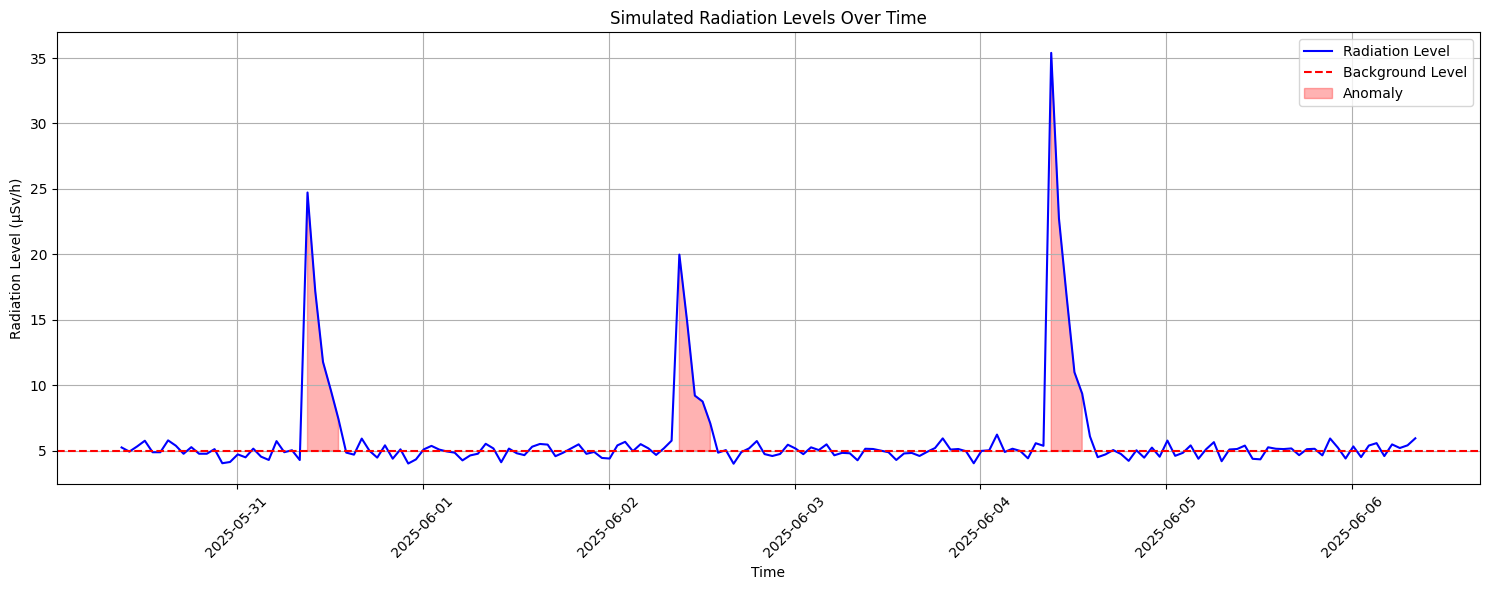

In [5]:
# Plot the radiation levels
plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['radiation_level'], 'b-', label='Radiation Level')
plt.axhline(y=background_radiation, color='r', linestyle='--', label='Background Level')
plt.fill_between(df['timestamp'], df['radiation_level'], background_radiation, 
                 where=(df['radiation_level'] > background_radiation + 3*noise_std),
                 color='red', alpha=0.3, label='Anomaly')

plt.title('Simulated Radiation Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Radiation Level (μSv/h)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
# Basic statistics
print("Basic Statistics:")
print(f"Mean radiation level: {df['radiation_level'].mean():.2f} μSv/h")
print(f"Standard deviation: {df['radiation_level'].std():.2f} μSv/h")
print(f"Maximum level: {df['radiation_level'].max():.2f} μSv/h")
print(f"Minimum level: {df['radiation_level'].min():.2f} μSv/h")

# Count number of anomalies (values more than 3 standard deviations from background)
anomalies = df[df['radiation_level'] > background_radiation + 3*noise_std]
print(f"\nNumber of anomalous readings: {len(anomalies)}")


Basic Statistics:
Mean radiation level: 5.88 μSv/h
Standard deviation: 3.71 μSv/h
Maximum level: 35.40 μSv/h
Minimum level: 4.01 μSv/h

Number of anomalous readings: 15
